# TensorFlow Crash Course
# Part 2 Tensor Operations

## Imports

In [2]:
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt

## Motivation: No For loops

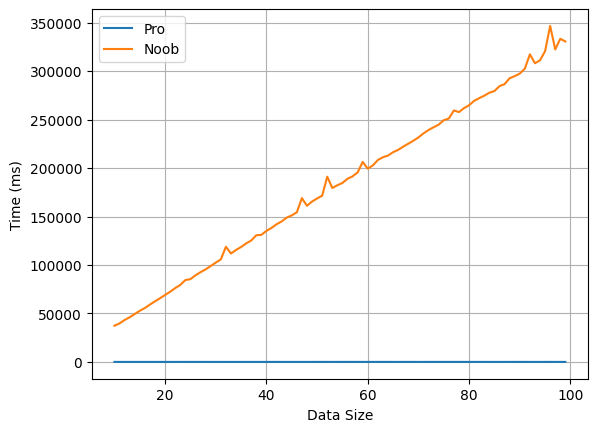

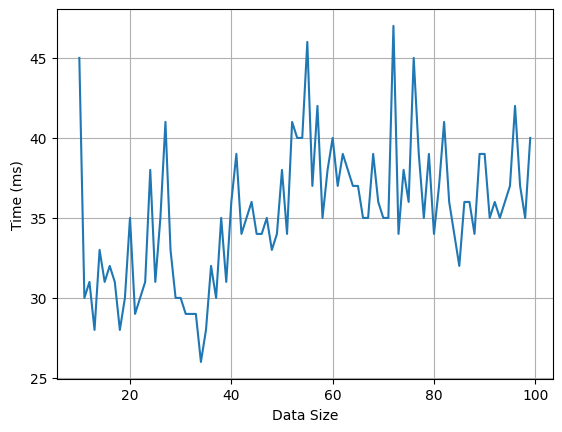

In [68]:
batch_size = 32

min_size = 10
max_size = 25

noob_time = []
pro_time = []

for size in range(min_size, max_size):
    data = tf.random.normal(shape=(batch_size, size))

    # Noob
    start = datetime.datetime.now()

    result = []
    for i in range(batch_size):
        tmp = sum(data[i, :])
        result.append(tmp)

    result = tf.convert_to_tensor(result)

    end = datetime.datetime.now()

    delta_ms = (end - start).microseconds
    
    noob_time.append(delta_ms)
    
    # Pro

    start = datetime.datetime.now()
    result =  tf.math.reduce_sum(data, axis=1)
    end = datetime.datetime.now()
    delta_ms = (end - start).microseconds
    
    pro_time.append(delta_ms)

# 1st plot: compare pro and noob time
plt.plot(range(min_size, max_size), pro_time, label="Pro")
plt.plot(range(min_size, max_size), noob_time, label="Noob")
plt.legend()
plt.grid(True)
plt.title("Duration of summing up all element")
plt.xlabel("Data Size")
plt.ylabel("Time (ms)")
plt.show()

# 2nd plot: only pro time
plt.plot(range(min_size, max_size), pro_time)
plt.grid(True)
plt.xlabel("Data Size")
plt.ylabel("Time (ms)")
plt.show()


## Tensor

- Arrangement numbers along n axes - n refers to the dimensionality of the Tensor
- Structure to store data

### Sentence = Sequence of Word Embeddings (Matrix)
![title](images/Tensor_WordEmbeddings.jpeg)

### Image
![title](images/Tensor_Image.jpeg)

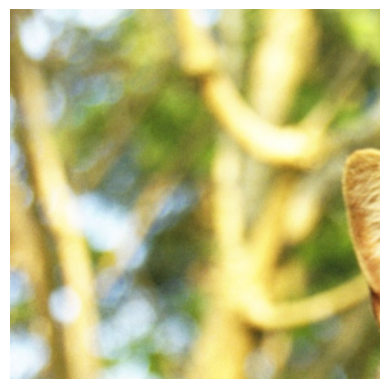

[204 218 218]


In [22]:
img = plt.imread("./images/cat.jpg")
# img.shape = (1024, 1500, 3)

img_1 = img[:500, :500, :] # (500, 500, 3)
plt.imshow(img_1)
plt.axis("off")
plt.show()

rgb_50_50 = img[50, 50, :] # RGB values at position (50,50)
print(rgb_50_50) 

### Batch of Images
![title](images/Tensor_ImageBatch.jpeg)

### Batch of Images
![title](images/Tensor_Video.jpeg)

## Generation

In [72]:
x = tf.random.normal(shape=(16, 16, 1))
x = tf.zeros(shape=(16, 16, 1))

## Element-wise operations

In [74]:
a = tf.random.normal(shape=(16, 16, 1))
b = tf.random.normal(shape=(16, 16, 1))

y = a + b
y = a - b
y = a * b
y = a / b

## Aggregation
Combining several values into a single representative value

In [87]:
img_rgb = tf.random.normal(shape=(256, 256, 3))
img_grey = tf.math.reduce_mean(img_rgb, axis=-1) # (r + g + b) / 3
img_grey.shape

TensorShape([256, 256])

## Matrix Multiplication

In [88]:
a = tf.random.normal(shape=(8, 16))
b = tf.random.normal(shape=(16, 8))

y = a @ b # 8x16 * 16x8 = 8x8
y.shape

TensorShape([8, 8])

Batchwise matrix multiplication

In [89]:
batch_size = 32
a = tf.random.normal(shape=(batch_size, 8, 16))
b = tf.random.normal(shape=(batch_size, 16, 8))

y = a @ b # 8x16 * 16x8 = 8x8
y.shape # (batch_size, 8, 8)

TensorShape([32, 8, 8])

## Tensor Modications

### Add and remove dimensions
Most use case: Inference

In [177]:
def model_stub(x):
    # A stub is a piece of code used to stand in for some other programming functionality. 
    # This stub simulates the behavior of a TensorFlow model - its output.
    batch_size = x.shape[0]
    return tf.random.normal(shape=(batch_size, 10))

img = tf.random.normal(shape=(28,28,1)) # e.g. MNIST ;)

# add batch dim
img = tf.expand_dims(img, axis=0) # (1, 28, 28, 1)

predication = model_stub(img) # (1, 10)

# remove batch dim
predication = predication[0] # (10,)


### Concatenate

In [153]:
a = tf.constant([[0,1,2], [3,4,5]]) # (2, 3)
b = tf.constant([[6,7,8], [9,10,11]]) # (2, 3)
print(a)
print(b)
print("###############")

c = tf.concat([a,b], axis=0) # (2 + 2, 3)
print(c)

tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 6  7  8]
 [ 9 10 11]], shape=(2, 3), dtype=int32)
###############
tf.Tensor(
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]], shape=(4, 3), dtype=int32)


In [154]:
c = tf.concat([a,b], axis=1) # (2, 3 + 3)
print(c)

tf.Tensor(
[[ 0  1  2  6  7  8]
 [ 3  4  5  9 10 11]], shape=(2, 6), dtype=int32)


In [155]:
batch_size = 32
a = tf.random.normal(shape=(batch_size, 8, 16))
b = tf.random.normal(shape=(batch_size, 8, 64))

c = tf.concat([a,b], axis=-1) # here: axis=-1 <=> axis=2
c.shape # (batch_size, 8, 16 + 64)

# not work: 
#                                                 *target axis*
# c = tf.concat([a,b], axis=0)   (*batch_size*, 8, 16)      (*batch_size*, 8, 64)
# c = tf.concat([a,b], axis=1)   (batch_size, *8*, 16)      (batch_size, *8*, 64)

TensorShape([32, 8, 80])

**Rule of thumb: Both tensors must have same shape. Only the length of the axis where the concatenation is performed (here called "target axis") is allowed to be different.**

## Stack
Concat along a new axis specified by `axis`.

In [156]:
# image size: 256x256
# RGB: 3 color channels -> red, green, blue

red_channel = tf.random.normal(shape=(256, 256))
green_channel = tf.random.normal(shape=(256, 256))
blue_channel = tf.random.normal(shape=(256, 256))

img_rgb = tf.stack([red_channel, green_channel, green_channel], axis=2) # axis=2 <=> axis=-1
img_rgb.shape

TensorShape([256, 256, 3])

In [157]:
tmp = tf.stack([red_channel, green_channel, green_channel], axis=0)
tmp.shape

TensorShape([3, 256, 256])

### Stacking based on concatenation

In [158]:
red_channel = tf.random.normal(shape=(256, 256))
green_channel = tf.random.normal(shape=(256, 256))
blue_channel = tf.random.normal(shape=(256, 256))

red_channel = tf.expand_dims(red_channel, axis=-1)      # (256, 256, 1)
green_channel = tf.expand_dims(green_channel, axis=-1)  # (256, 256, 1)
blue_channel = tf.expand_dims(blue_channel, axis=-1)    # (256, 256, 1)

img_rgb = tf.concat([red_channel, green_channel, green_channel], axis=-1)
img_rgb.shape

TensorShape([256, 256, 3])

### Duplication

In [159]:
x = tf.constant([[0,1,2], [3,4,5]]) # (2, 3)
x = tf.tile(x, multiples=(1,2)) 
x # (2, 3 * 2)

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]], dtype=int32)>

In [160]:
x = tf.constant([[0,1,2], [3,4,5]]) # (2, 3)
x = tf.tile(x, multiples=(2,1))
x # (2 * 2, 3) 

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]], dtype=int32)>

Batch of single element e.g. image

In [161]:
batch_size = 32
img = tf.random.normal(shape=(256,256,3))

# add batch dim
img = tf.expand_dims(img, axis=0) # (1, 256, 256, 3)
img = tf.tile(img, multiples=(batch_size, 1, 1, 1))
img.shape

TensorShape([32, 256, 256, 3])

## Tensor Broadcasting
Perform element-wise operations on tensors with different shape. 

In [36]:
a = tf.constant([[1,2,3]])
b = tf.constant([[4],[5],[6]])
print(a) # (1, 3)
print(b) # (3, 1)
print("##########")

print(a + b) # (3,3)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
tf.Tensor(
[[4]
 [5]
 [6]], shape=(3, 1), dtype=int32)
##########
tf.Tensor(
[[5 6 7]
 [6 7 8]
 [7 8 9]], shape=(3, 3), dtype=int32)


a.shape = `(1, 3)`

b.shape = `(3, 1)`

Pair shape of these two Tensors going from left to right: (3,1) and (1, 3) 

### When possible?

Tensor broadcasting possible if for each dimension pair are equal or one of them is 1.
- (3, 1) &check;  
- (1, 3) &check;  

### Output shape

Maximum of each dimension pair
- (3, 1) &#8594; 3
- (1, 3) &#8594; 3

Overall `(3,3)`

Values along axes with dim=1 win `a` and `b` will be duplicated 

&#8594; Both shape match

&#8594; Element-wise operation

In [41]:
a = tf.constant([[1,2,3], [1,2,3], [1,2,3]])  # (3, 3)
b = tf.constant([[4,4,4], [5,5,5], [6,6,6]])  # (3, 3)
a + b

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]], dtype=int32)>

### Handling Rank 0 Tensors

In [48]:
a = tf.constant([[1,2,3]]) # (1, 3)
b = 5 # <=> tf.constant([[5,5,5]])

print(a*b) # (1,3)

tf.Tensor([[ 5 10 15]], shape=(1, 3), dtype=int32)


a.shape = `(1, 3)`

b.shape = `()`

Pairs: (3,1), (1,1)   (fill-up missing values with 1)